In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Bayes Theorem

![image](f1.bmp)

![](f2.bmp)

![](f3.bmp)

![](f4.bmp)

![](f5.bmp)

# Algorithm

# Classifier

In [3]:
class NaiveBayesClassifier:
    """
    Naive Bayes Classifier
    
    Attributes
    ----------------
    _classes : one-dimensional array
        vector of classes
    _means : two-dimensional array 
        matrix of means in dimensions [n_classes, n_features]
    _vars : two-dimensional array
        matrix of variances in dimensions [n_classes, n_features]
    _priors : one-dimensional array
        vector of probabilities a priori
        
    Methods
    -----------------
    fit(X, y)
        fits classifier to data
    predict(X)
        predict classes for samples in matrix X
    __predict(xi)
        predict class for single vector xi
    __proba_density(mean, var, xi)
        return density of probability for mean, var and xi
    """
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        # placeholders for mean, variance and priors
        self._means = np.zeros((n_classes, n_features), dtype=np.float64)
        self._vars = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        # 'train' algorithm
        for i, class_ in enumerate(self._classes):
            X_class_ = X[y == class_]
            self._means[i, :] = X_class_.mean(axis=0)
            self._vars[i, :] = X_class_.var(axis=0)
            self._priors[i] = X_class_.shape[0] / float(n_samples)

    
    def predict(self, X):
        return np.array([self.__predict(xi) for xi in X])
    
    def __predict(self, xi):
        posteriors = list()
        for i in range(len(self._classes)):
            prior = np.log(self._priors[i])
            mean = self._means[i]
            var = self._vars[i]
            likehood = np.sum(np.log(self.__proba_density(mean, var, xi)))
            posterior = likehood + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]
            
    
    def __proba_density(self, mean, var, xi):
        return (np.exp(-(xi - mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var))

# Traing Classifier

In [4]:
nb = NaiveBayesClassifier()
nb.fit(X_train[:, [0, 2]], y_train)

# Validate classifier

In [5]:
pred = nb.predict(X_test[:, [0, 2]])
print(accuracy_score(pred, y_test))

0.8666666666666667


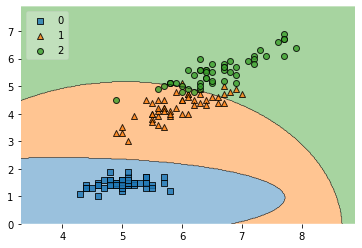

In [6]:
plot_decision_regions(X[:, [0, 2]], y, clf=nb, legend=2)
plt.show()